# Untersuchung der Forschungsfrage 2
## Diskrepanzen im Vergleich mit der Single Source of Truth

__Ziel__: Mit der Analyse in diesem File wird die Forschungsfrage 2 innerhalb der Projektdokumentation geklärt.

__Aufbau__: Nebst der Klärung der Frage ist ebenso die Transparenz der Vorgehensweise und verwendeten Methoden wichtig, sodass der Auftraggeber den Code reproduzieren kann für weitere oder ähnliche Untersuchungen. Der Aufbau gliedert sich in verschiedene Schritte, Ausschnitte aus diesem File (insbesondere Visualisierungen & Erkenntnisse) finden sich in der Dokumentation wieder.

1. Schritt 1: Imports & verwendete Bibliotheken
2. Schritt 2: Erstellen des Dataframes
3. Schritt 3: Datenvalidierung & Data cleaning
4. Schritt 4: Erweiterung des DataFrames
5. Schritt 5: Auswertungen
6. Schritt 6: Visualisierungen
7. Schritt 7: Anhang

__These__: Zwischen den publizierten Ankunftszeiten der Flughafenbetreiber und der Single Source of 
Truth (namentlich die Webseite vo  (LNRS Data Service)), existieren messbare Unterschiede in 
den Zeitangaenn

# Schritt 1: Imports & Bibliotheken

**Folgende Module müssen importiert werden:**
1. . **Warnings:**
   - **Import:** `import warnings`
   - **Zweck:** Deaktivierung von Warnmeldungen für eine verbesserte Lesbarkeit.
   - **Verwendung:** `warnings.filterwarnings(rigno
e')`

2. **Matplotlib Inline:**
   - **Direktive:** `%matplotlib inline`
   - **Zweck:** Ermöglicht die Anzeige von Matplotlib-Grafiken direkt im Jupyter Notebook.

3. **Pylab Inline:**
   - **Direktive:** `%pylab inline`
   - **Zweck:** Analog zu `%matplotlib inline`, stellt es eine einfache Möglichkeit dar, Matplotlib und NumPy gemeinsam zu verwenden und die Grafiken direkt im Notebook anzuzeigen.

4. **StrictVersion:**
   - **Import:** `from distutils.version import StrictVersion`
   - **Zweck:** Überprüfung der Versionen von Bibliotheken, um Kompatibilitätsprobleme zu vermeiden.

5. **Pandas:**
   - **Import:** `import pandas as pd`
   - **Version:** `assert StrictVersion(pd.__version__) >= StrictVersion('0.19.0')`
   - **Zweck:** Verwendung für Datenmanipulation und Analyse, insbesondere für Operationen mit DataFrames.

6. **Seaborn:**
   - **Import:** `import seaborn as sns`
   - **Version:** `assert StrictVersion(sns.__version__) >= StrictVersion('0.7.0')`
   - **Zweck:** Eingesetzt für statistis ualisierung und ästhet
sch ansprechende Grafiken.

7. **IPython Display:**
   - **Import:** `from IPython.display import display`
   - **Zweck:** Verbesserte Ausgabe von Datenframes und anderen Objekten direkt im Jupyter Notebook.

8. **Scipy Stats:**
   - **Import:** `from scipy.stats import linregress`
   - **Zweck:** Wird für statistische Berechnungen, oninsbesondere für die Durchführung linearen Regressionen verwendet.



In [4]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Enable inline plotting
%matplotlib inline

# Core libraries
import pandas as pd
import seaborn as sns
import sys
from scipy.stats import linregress
from IPython.display import display

# Ensure compatibility with specific versions
from distutils.version import StrictVersion
assert StrictVersion(pd.__version__) >= StrictVersion('0.19.0')
assert StrictVersion(sns.__version__) >= StrictVersion('0.7.0')


In [5]:
print(pd.__version__) #Überprüfen der vorhandenen Version von pandas
print(sns.__version__) #Überprüfen der vorhandenen Version von seaborn

2.2.3
0.13.2


# Schritt 2: Erstellen des Dataframes

Zu Beginn werden die Daten `Delay_querry_20240411.json` in ein dataframe geladen `pd.read_json()`.

Im Anschluss wird der Datentyp `type()`und der Output visuell überprüft `head()` und eine erste Gliederung der enthaltenen Einträge betrachtet `count()`.

In [3]:
data = pd.read_json('Delay_querry_20240412.json')

In [4]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [5]:
#pd.set_option('display.max_rows', data.shape[0]+1) #Anzeigen aller Zeilen im Output!
#display(data)
display(data.head())

,flight_id,date_arrival,arrival_airport,scheduled_arrival,status,code_share,departure_airport,calculated_gate_delay_api,calculated_runway_delay_api,delay_arrival_zrh,delay_arrival_gva
0,3O544,2024-04-04,GVA,12:00:00,L,"[""""]",CMN,10.0,6.0,NaN,5.0
1,3O544,2024-04-07,GVA,18:35:00,L,"[""""]",CMN,18.0,16.0,NaN,15.0
2,EFW2552,2024-04-01,GVA,19:45:00,L,"[""BA2552""]",LGW,2.0,-2.0,NaN,-2.0
3,EFW2552,2024-04-04,GVA,13:45:00,L,"[""BA2552""]",LGW,-10.0,-13.0,NaN,-14.0
4,EFW2552,2024-04-05,GVA,13:45:00,L,"[""BA2552""]",LGW,-9.0,-13.0,NaN,-13.0


In [6]:
print(data.shape)

(3682, 11)


In [7]:
data.count()

flight_id                      3682
date_arrival                   3682
arrival_airport                3682
scheduled_arrival              3682
status                         3682
code_share                     3682
departure_airport              3682
calculated_gate_delay_api      3666
calculated_runway_delay_api    3610
delay_arrival_zrh              2253
delay_arrival_gva              1161
dtype: int64

Aus dieser ersten deskriptiven Beschreibung lässt sich folgendes zusammenfassen über die Rohdaten:

1. Total sind 3682 Einträge vorhanden
2. Für die Variablen `flight_id` bis `departure_airport` sind die Daten vollständig vorhanden
3. Für alle weiteren Variablen fehlen Werte. Dies ist bei spezifischen Variablen durchaus erklärbar denn:
   -  Für alle Variablen mit `zrh` oder `gva` in der Bezeichnung, kann jeweils nur bei einer Variable ein Wert vorhanden sein, bedingt durch den Ankunftsort eines Fluges.
   -  Bei den Variablen `calculated_gate_delay_api` und `calculated_runway_delay_api` können Werte fehlen (sprich NaN-Werte vorhanden) wenn der delay = 0 Minuten beträgt

Es zeigt sich also bereits jetzt, dass der Umgang mit fehlenden Werten schwierig und situativ je Variable zu handhaben ist. Dies ist eine wichtige Erkenntnis für den nächsten Schritt.

# Schritt 3: Daten Validierung & Data cleaning

**Grundsatz**: In der Spalte arrival_airport dürfen keine NaN-Werte vorkommen, da sonst nicht zuzuordnen ist ob der FLug in Zürich oder Genf gelandet ist

In [8]:
pd.set_option('display.max_rows', data.shape[0]+1) #Anzeigen aller Zeilen im Output!
display(data['arrival_airport'].isnull().any()) #Nach NaN-Werten in der Spalte arrival_airport suchen

False

In [9]:
#data[data.isnull().any(axis=1)] #Anzeigen aller Zeilen mit NaN-Werten bringt keinen Vorteil, da bedingtermassen immer ein NaN-Wert vorhanden sein muss

**Überprüfung Teil 1**:

Um die These zu überprüfen sind nebst den beiden Spalten `delay_arrival_zrh`und `delay_arrival_gva` die beiden delays der API relevant. Bekannt ist, dass von den Flughafenbetreiber jeweils der Zeiptunkt als Landezeit genommen wird, bei dem das Flugzeug auf dem Rollfeld aufsetzt. Daher wird die Spalte `calculated_runway_delay_api` für die spätere Berechnung verwendet. Betrachten wir nun NaN-Werte in den erwähnten Spalten der API:	

In [10]:
display(data[data['calculated_gate_delay_api'].isnull()])

,flight_id,date_arrival,arrival_airport,scheduled_arrival,status,code_share,departure_airport,calculated_gate_delay_api,calculated_runway_delay_api,delay_arrival_zrh,delay_arrival_gva
162,BJ184,2024-04-07,GVA,15:00:00,L,"[""""]",TUN,NaN,51.0,NaN,50.0
165,CA861,2024-04-05,GVA,07:15:00,L,"[""TP8333""]",PEK,NaN,89.0,NaN,87.0
170,EI680,2024-04-04,GVA,09:30:00,L,"[""AA8099""]",DUB,NaN,52.0,NaN,53.0
175,EI684,2024-04-06,GVA,16:30:00,L,"[""AA8099""]",DUB,NaN,72.0,NaN,NaN
254,U27643,2024-04-02,GVA,14:20:00,L,"[""""]",LIS,NaN,NaN,NaN,219.0
398,U21316,2024-04-03,GVA,22:15:00,L,"[""""]",NTE,NaN,833.0,NaN,NaN
904,LS1339,2024-04-06,GVA,18:05:00,L,"[""""]",BHX,NaN,-14.0,NaN,NaN
3434,3V4828,2024-04-06,GVA,06:03:00,L,"[""""]",CDG,NaN,1.0,NaN,NaN
3435,3V4862,2024-04-02,GVA,06:47:00,L,"[""""]",MLH,NaN,-12.0,NaN,NaN
3436,3V4862,2024-04-03,GVA,06:47:00,L,"[""""]",MLH,NaN,8.0,NaN,NaN


In [11]:
display(data[data['calculated_runway_delay_api'].isnull()])

,flight_id,date_arrival,arrival_airport,scheduled_arrival,status,code_share,departure_airport,calculated_gate_delay_api,calculated_runway_delay_api,delay_arrival_zrh,delay_arrival_gva
10,A3854,2024-04-04,GVA,10:30:00,L,"[""LX4335""]",ATH,-6.0,NaN,NaN,-1.0
11,A3854,2024-04-05,GVA,11:00:00,L,"[""AC6043"", ""LX4335""]",ATH,2.0,NaN,NaN,5.0
12,A3854,2024-04-06,GVA,10:30:00,L,"[""AC6043"", ""LX4335""]",ATH,-13.0,NaN,NaN,NaN
13,A3854,2024-04-07,GVA,11:00:00,L,"[""AC6043"", ""LX4335""]",ATH,-8.0,NaN,NaN,-15.0
236,U27283,2024-04-01,GVA,17:00:00,L,"[""""]",PMI,25.0,NaN,NaN,20.0
254,U27643,2024-04-02,GVA,14:20:00,L,"[""""]",LIS,NaN,NaN,NaN,219.0
290,EK83,2024-04-02,GVA,19:20:00,L,"[""QF8083""]",DXB,-4.0,NaN,NaN,-8.0
450,U21338,2024-04-05,GVA,09:05:00,L,"[""""]",ORY,-7.0,NaN,NaN,-11.0
494,U21386,2024-04-06,GVA,13:55:00,L,"[""""]",BIO,27.0,NaN,NaN,NaN
593,U21470,2024-04-02,GVA,15:05:00,L,"[""""]",FNC,-9.0,NaN,NaN,-13.0


In [12]:
display(data[data['calculated_runway_delay_api'].isnull() & data['calculated_gate_delay_api'].isnull()])

,flight_id,date_arrival,arrival_airport,scheduled_arrival,status,code_share,departure_airport,calculated_gate_delay_api,calculated_runway_delay_api,delay_arrival_zrh,delay_arrival_gva
254,U27643,2024-04-02,GVA,14:20:00,L,"[""""]",LIS,NaN,NaN,NaN,219.0


**Überprüfung Teil 2**:

Folgende Bereinigung ist meiner Meinung nach möglich, ohne die Daten zu stark zu beeinflussen:
1. Wenn die Variable `calculated_runway_delay_api` den Wert 0 und `calculated_gate_delay_api` einen NaN-Wert hat, dann wird `calculated_gate_delay_api` ebenfalls auf den Wert 0 gesetzt.
2. Wenn die Variable `calculated_runway_delay_api` einen NaN-Wert und `calculated_gate_delay_api` den Wert 0 hat, dann wird `calculated_runway_delay_api` ebenfalls auf den Wert 0 gesetzt.
3. Wenn die Variable `calculated_runway_delay_api` einen NaN-Wert und `calculated_gate_delay_api` eine reale Zahl als Wert hat, dann wird für `calculated_runway_delay_api` dessen Mittelwert verwendet.
4. Wenn die Variable `calculated_runway_delay_api` eine reale Zahl als Wert und `calculated_gate_delay_api` einen NaN-Wert hat, dann wird für `calculated_gate_delay_api` dessen Mittelwert verwendet.


Kritisch für die Weiterverarbeitung wird es dann, wenn Werte in den beiden Spalten gleichzeitig fehlen. Dies ist in einer Beobachtung der Fall:
- Es handelt sich dabei um einen EasyJet Flug am 02.04.2024, welcher 219 min nach der geplanten Ankunftszeit um 14:20 angekommen ist.
- In den Rohdaten aus dem Scraping der Webseite des Flughafenbetreibers ist dieser Eintrag ohne NaN-Werte zu finden.
- Die Fehlerquelle muss also ausserhalb dieses Prozesses liegen.
- Die genaue Ursache für den fehlenden Eintrag zu finden ist schwierig
- Da es sich um eine grosse Verspätung handelt (219 min.) wäre beim Verwenden eines Mittelwertes, Verwenden der gleichen Verspätung oder der Verwendung des Wertes 0 derer Auswirkung sehr gross.
- Da es sich nur um eine Beobachtung handelt, wurde entschlossen diesen Eintrag aus den Daten zu entfernen.

In [13]:
df = data.copy() #Erstellen eines neuen Dataframes für die Veränderungen
print(type(df))

<class 'pandas.core.frame.DataFrame'>


Gemäss Beschreibung der Bereinigung unter **Punkt 1**:

In [14]:
set_zero_1 = (df['calculated_runway_delay_api'] == 0) & (df['calculated_gate_delay_api'].isna())
df.loc[set_zero_1, 'calculated_gate_delay_api'] = 0

Gemäss Beschreibung der Bereinigung unter **Punkt 2**:

In [15]:
set_zero_2 = (df['calculated_gate_delay_api'] == 0) & (df['calculated_runway_delay_api'].isna())
df.loc[set_zero_2, 'calculated_runway_delay_api'] = 0

Gemäss Beschreibung der Bereinigung unter **Punkt 3**:

In [16]:
mean_runway_delay = df['calculated_runway_delay_api'].mean()
set_mean_1 = (df['calculated_runway_delay_api'].isna()) & (df['calculated_gate_delay_api'].notna())
df.loc[set_mean_1, 'calculated_runway_delay_api'] = mean_runway_delay

In [17]:
mean_gate_delay = df['calculated_gate_delay_api'].mean()
set_mean_2 = (df['calculated_gate_delay_api'].isna()) & (df['calculated_runway_delay_api'].notna())
df.loc[set_mean_2, 'calculated_gate_delay_api'] = mean_gate_delay

Gemäss Beschreibung des Entfernen des Eintrages (EaseJet Flug am 02.04.2024):

In [18]:
df.dropna(subset=['calculated_gate_delay_api', 'calculated_runway_delay_api'], how='all', inplace=True)

Erneute visuelle Überprüfung der Einträge

In [19]:
display(df[df['calculated_runway_delay_api'].isnull()])

,flight_id,date_arrival,arrival_airport,scheduled_arrival,status,code_share,departure_airport,calculated_gate_delay_api,calculated_runway_delay_api,delay_arrival_zrh,delay_arrival_gva


In [20]:
display(df[df['calculated_gate_delay_api'].isnull()])

,flight_id,date_arrival,arrival_airport,scheduled_arrival,status,code_share,departure_airport,calculated_gate_delay_api,calculated_runway_delay_api,delay_arrival_zrh,delay_arrival_gva


**Überprüfung Teil 3:**

Nun zur Validierung der Daten in den Spalten `delay_arrival_zrh` und `delay_arrival_gva`:
- Dazu müssen die fehlenden Daten in der beiden genannten Spalten betrachtet werden unter der Bedingung dass in `arrival_airport` der jeweilige Flughafen vorhanden ist .

In [21]:
#Filterbedingung: NaN-Wert und Ankunftsort ZHR
mask_zrh = df['delay_arrival_zrh'].isnull() & (df['arrival_airport'] == 'ZRH')

#Anwenden des Filters auf den DataFrame df
filtered_df = df[mask_zrh]

#überprüfen
#display(filtered_df)

#Ausgabe der Dimension des gefilterten DataFrames, diese Einträge sollen aus dem DataFrame df entfernt werden
print("Anzahl der Zeilen und Spalten:", filtered_df.shape)

Anzahl der Zeilen und Spalten: (39, 11)


In [22]:
print(df.shape)
df = df[~mask_zrh]
print(df.shape)

(3681, 11)
(3642, 11)


In [23]:
#Filterbedingung: NaN-Wert und Ankunftsort GVA
mask_gva = df['delay_arrival_gva'].isnull() & (df['arrival_airport'] == 'GVA')

#Anwenden des Filters auf den DataFrame
filtered_df = df[mask_gva]

#Anzeigen des gefilterten DataFrames
#display(filtered_df)
print("Anzahl der Zeilen und Spalten:", filtered_df.shape)

Anzahl der Zeilen und Spalten: (229, 11)


In [24]:
df = df[~mask_gva]
print(df.shape)

(3413, 11)


Es ist erkenntlich, dass im Dataframe in den Spalten `delay_arrival_zrh`und `delay_arrival_gva` sich noch NaN-Werte befinden. Folgende Gründe sind bekannt:
1. Fehler im Scrapingprozess Ausführungsdatum 06.04.2024: Siehe Beschreibung in Dokumentation Kapitel 5.1.1
2. Fehlende Zuordnung zu FLug aus SoT.

Handhabung: Diese Einträge werden aus dem DataFrame entfernt. Betroffen sind 268 Einträge von total 3682, dies entspricht einem Datenverlust von 7.85%.

# Schritt 4: Erweiterung des Dataframes

Da nun die Daten bereinigt wurden, werden weitere Variablen hinzugefügt für anschliessende Vergleiche. Folgende Vorgehensweise ist dabei angedacht:

**Idee der Erweiterung des Dataframes:**

Um eine Differenz zwischen angegebenen Ankunftszeiten der FLughafenbetreiber und der SoT zu untersuchen, wird folgende Überlegung gemacht:

**Positiver Wert**: Zeigt an, dass die vom Flughafen gemeldete Ankunftszeit später ist als die von der SoT gemeldete. Dies kann darauf hindeuten, dass die Flughafendaten eine größere Verzögerung anzeigen als die tatsächlich gemessene, was zu einer Überbewertung der Verspätung führt.

  **Wert gleich Null**: Die vom Flughafen und die von der SoT gemeldeten Ankunftszeiten stimmen überein. Dies zeigt eine perfekte Übereinstimmung der Daten und kann als Indikator für hohe Datenqualität und -genauigkeit gesehen werden.

**Negativer Wert**: Die vom Flughafen gemeldete Ankunftszeit ist früher als die von der SoT gemeldete. Dies kann darauf hinweisen, dass die Flughafendaten die Verspätung unterschätzen oder eine frühere Ankunft anzeigen, als tatsächlich stattgefunde

.

**Methodik:**

Die berechtigte Frage an dieser Stelle ist, die Wahl der Methode zur Berechnung und Bewertung der Richtigkeit von Ankunftszeiten. Folgende Ansätze sind möglich:
- **Absolute Berechnung der Ankunftszeiten:**
  - Berechnen der Differenz zwischen der tatsächlichen Landezeit laut Single Source of Truth und der vom Flughafen veröffentlichten Landeze Dieser Schritt wurde in den stage2 Files je Datenquelle gemacht.it.
- **Vergleich der berechneten Verspätungen / Früheren Ankünfte:**
  - Differenz zwischen der berechneten Verspätung laut API und der vom Flughafen berichteten Verspätu Dies ist im Join der 3 Datenquellen vorhanden und wird für die Beantwortung der Fragen schlussendlich verwendet.rt)

## Vorgehen

**Erweiterung des Dataframes:**

Für diese Auswertung sind weitere Variablen (Spalten) notwendig:
1. Differenz zwischen der Angabe der API und der Angabe der Gateankunft des Flughafen Zürich: `diff_zrh_api_gate`
2. Differenz zwischen der Angabe der API und der Angabe der Gateankunft des Flughafen Genf: `diff_gva_api_gate`
3. Differenz zwischen der Angabe der API und der Angabe der Runwayankunft des Flughafen Zürich: `diff_zrh_api_gate`
4. Differenz zwischen der Angabe der API und der Angabe der Runwayankunft des Flughafen Genf: `diff_gva_api_gate`


- 4 neue Spalten zum DataFrame hinzufügen: `np.na` setzt dabei zu Beginn alle Werte auf NaN

- Unterschied zwischen den Verzögerungen und der von der Single Source of Truth bereitgestellten Verzögerung berechnen in den neuen Spalten.

- Der Unterschied soll jedoch nur berechnet werden, wenn das Zielflughafenfeld`arrival_airport` entweder ZRH oder GVA ist. 
Wären andere Flughäfen vorhanden, würde der Wert auf NaN bleiben.
`df.loc[]` zusammen mit einer Bedingung, um die Zeilen zu identifizieren, die zu den Flughäfen ZRH bzw. GVA gehören.
`df['arrival_airport'] == 'ZRH'` bzw. `df['arrival_airport'] == 'GVA'`.

In [25]:
df['diff_zrh_api_gate'] = np.nan
df['diff_gva_api_gate'] = np.nan
df['diff_zrh_api_runway'] = np.nan
df['diff_gva_api_runway'] = np.nan
df.loc[df['arrival_airport'] == 'ZRH', 'diff_zrh_api_gate'] = df['delay_arrival_zrh'] - df['calculated_gate_delay_api']
df.loc[df['arrival_airport'] == 'GVA', 'diff_gva_api_gate'] = df['delay_arrival_gva'] - df['calculated_gate_delay_api']
df.loc[df['arrival_airport'] == 'ZRH', 'diff_zrh_api_runway'] = df['delay_arrival_zrh'] - df['calculated_runway_delay_api']
df.loc[df['arrival_airport'] == 'GVA', 'diff_gva_api_runway'] = df['delay_arrival_gva'] - df['calculated_runway_delay_api']

In [26]:
print(df.shape)

(3413, 15)


Erstellen eines neues Dataframes, welcher nur aus den relevanten Variablen besteht. Dies verbessert die Übersichtlichkeit.

In [27]:
new_columns_view = [
    "flight_id",
    "arrival_airport",
    "calculated_runway_delay_api",
    "calculated_gate_delay_api",
    "delay_arrival_zrh",
    "delay_arrival_gva",
    "diff_zrh_api_gate",
    "diff_gva_api_gate",
    "diff_zrh_api_runway",
    "diff_gva_api_runway"
]
df = df[new_columns_view]

In [28]:
print(type(df))
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
(3413, 10)


In [29]:
pd.set_option('display.max_rows', 50)
display(df)

,flight_id,arrival_airport,calculated_runway_delay_api,calculated_gate_delay_api,delay_arrival_zrh,delay_arrival_gva,diff_zrh_api_gate,diff_gva_api_gate,diff_zrh_api_runway,diff_gva_api_runway
0,3O544,GVA,6.0,10.0,NaN,5.0,NaN,-5.0,NaN,-1.0
1,3O544,GVA,16.0,18.0,NaN,15.0,NaN,-3.0,NaN,-1.0
2,EFW2552,GVA,-2.0,2.0,NaN,-2.0,NaN,-4.0,NaN,0.0
3,EFW2552,GVA,-13.0,-10.0,NaN,-14.0,NaN,-4.0,NaN,-1.0
4,EFW2552,GVA,-13.0,-9.0,NaN,-13.0,NaN,-4.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
3665,XQ960,ZRH,-4.0,3.0,1.0,NaN,-2.0,NaN,5.0,NaN
3666,XQ960,ZRH,-12.0,-6.0,-8.0,NaN,-2.0,NaN,4.0,NaN
3667,XQ960,ZRH,18.0,21.0,23.0,NaN,2.0,NaN,5.0,NaN
3668,XQ960,ZRH,-1.0,5.0,4.0,NaN,-1.0,NaN,5.0,NaN


- Durch die Verwendung von `df.groupby('arrival_airport')` werden die Einträge anhand der beiden Ankunftsflughäfen gruppiert und mittels `count()` die Einträge gezählt bei denen keine NaN-Werte vorhanden sind.
- Diese Anzahl Einträge müssen für die Untersuchung identisch sein je Ankunftsflughafen.

In [30]:
display(df.groupby('arrival_airport').count())

,flight_id,calculated_runway_delay_api,calculated_gate_delay_api,delay_arrival_zrh,delay_arrival_gva,diff_zrh_api_gate,diff_gva_api_gate,diff_zrh_api_runway,diff_gva_api_runway
arrival_airport,,,,,,,,,
GVA,1160,1160,1160,0,1160,0,1160,0,1160
ZRH,2253,2253,2253,2253,0,2253,0,2253,0


# Schritt 5: Grundlegende Auswertungen

Nun sind alle notwendigen Vorbereitungen getroffen und die eigentliche Untersuchung anhand der These kann beginnen:
- Als erstes werden die elementaren Teile der deskriptiven Statistik verwendet um die Daten zu prüfen.
- Ziel ist es Streuung, Verteilung und Einblick zu erhalten in die Daten je Ankunftsort.
- Verwendung von `describe()` für Einblicke in die deskriptive Statistik je Quelle & Messpunkt.
- Ansicht der grössten und kleinsten vorkommenden Werte je Spalte mit `nsmallest(Anzahl, Spaltenname)` und `nlargest(Anzahl, Spaltenname)`

In [31]:
df_zrh = df[df['arrival_airport'] == 'ZRH']
df_gva = df[df['arrival_airport'] == 'GVA']

#Für Zürich
stats_runway_delays_api_zrh = df_zrh['calculated_runway_delay_api'].describe() #Für die Daten aus der API
stats_gate_delays_api_zrh = df_zrh['calculated_gate_delay_api'].describe() #Für die Daten aus der API
stats_delays_zrh = df_zrh['delay_arrival_zrh'].describe() #Für die Daten des Scraping der Webseite Zürich
stats_diff_zrh_gate = df_zrh['diff_zrh_api_gate'].describe() #Für die berechneten Differenzen zwischen Zürich - API Gate
stats_diff_zrh_runway = df_zrh['diff_zrh_api_runway'].describe() #Für die berechneten Differenzen zwischen Zürich - API Runway

#Für Genf
stats_runway_delays_api_gva = df_gva['calculated_runway_delay_api'].describe() #Für die Daten aus der API
stats_gate_delays_api_gva = df_gva['calculated_gate_delay_api'].describe() #Für die Daten aus der API
stats_delays_gva = df_gva['delay_arrival_gva'].describe() #Für die Daten des Scraping der Webseite Genf
stats_diff_gva_gate = df_gva['diff_gva_api_gate'].describe() #Für die berechneten Differenzen zwischen Genf - API Gate
stats_diff_gva_runway = df_gva['diff_gva_api_runway'].describe() #Für die berechneten Differenzen zwischen Genf - API Runway

In [32]:
print(f'Statistik zu den absoluten Werte der API für ZRH (Gate): \n{stats_gate_delays_api_zrh}')

Statistik zu den absoluten Werte der API für ZRH (Gate): 
count    2253.000000
mean        9.461607
std        24.784739
min       -51.000000
25%        -5.000000
50%         5.000000
75%        18.000000
max       282.000000
Name: calculated_gate_delay_api, dtype: float64


In [33]:
print(f'Statistik zu den absoluten Werte der API für ZRH (Runway): \n{stats_runway_delays_api_zrh}')

Statistik zu den absoluten Werte der API für ZRH (Runway): 
count    2253.000000
mean        4.446310
std        23.757136
min       -54.000000
25%        -9.000000
50%         0.000000
75%        12.000000
max       281.000000
Name: calculated_runway_delay_api, dtype: float64


In [34]:
print(f'Statistik zu den absoluten Werte von ZRH: \n{stats_delays_zrh}')

Statistik zu den absoluten Werte von ZRH: 
count    2253.000000
mean        9.541944
std        24.659162
min       -48.000000
25%        -5.000000
50%         5.000000
75%        17.000000
max       283.000000
Name: delay_arrival_zrh, dtype: float64


In [35]:
print(f'Statistik zu den berechneten Differenzwerten von ZRH (Runway): \n{stats_diff_zrh_runway}')

Statistik zu den berechneten Differenzwerten von ZRH (Runway): 
count    2253.000000
mean        5.095634
std         7.731912
min       -56.000000
25%         4.000000
50%         5.000000
75%         6.000000
max       261.222745
Name: diff_zrh_api_runway, dtype: float64


In [36]:
print(f'Statistik zu den berechneten Differenzwerten von ZRH (Gate): \n{stats_diff_zrh_gate}')

Statistik zu den berechneten Differenzwerten von ZRH (Gate): 
count    2253.000000
mean        0.080337
std         3.178557
min       -60.000000
25%        -1.000000
50%         0.000000
75%         1.000000
max        62.000000
Name: diff_zrh_api_gate, dtype: float64


In [37]:
print(f'Statistik zu den absoluten Werte der API für GVA (Gate: \n{stats_gate_delays_api_gva}')

Statistik zu den absoluten Werte der API für GVA (Gate: 
count    1160.000000
mean        7.570303
std        23.710014
min       -60.000000
25%        -7.000000
50%         2.000000
75%        15.000000
max       216.000000
Name: calculated_gate_delay_api, dtype: float64


In [38]:
print(f'Statistik zu den absoluten Werte der API für GVA (Runway): \n{stats_runway_delays_api_gva}')

Statistik zu den absoluten Werte der API für GVA (Runway): 
count    1160.000000
mean        4.603342
std        23.598556
min       -43.000000
25%       -10.000000
50%         0.000000
75%        11.000000
max       213.000000
Name: calculated_runway_delay_api, dtype: float64


In [39]:
print(f'Statistik zu den absoluten Werte von GVA: \n{stats_delays_gva}')

Statistik zu den absoluten Werte von GVA: 
count    1160.000000
mean        3.768103
std        23.597843
min       -44.000000
25%       -11.000000
50%        -1.000000
75%        11.000000
max       216.000000
Name: delay_arrival_gva, dtype: float64


In [40]:
print(f'Statistik zu den berechneten Differenzwerten von GVA (Gate): \n{stats_diff_gva_gate}')

Statistik zu den berechneten Differenzwerten von GVA (Gate): 
count    1160.000000
mean       -3.802199
std         7.868201
min      -102.000000
25%        -5.000000
50%        -4.000000
75%        -3.000000
max        95.000000
Name: diff_gva_api_gate, dtype: float64


In [41]:
print(f'Statistik zu den berechneten Differenzwerten von GVA (Runway): \n{stats_diff_gva_runway}')

Statistik zu den berechneten Differenzwerten von GVA (Runway): 
count    1160.000000
mean       -0.835239
std         6.727302
min       -99.000000
25%        -1.000000
50%        -1.000000
75%         0.000000
max        98.000000
Name: diff_gva_api_runway, dtype: float64


In [42]:
min_value_rows_gva = df.nsmallest(10, 'diff_gva_api_gate')
display(min_value_rows_gva)

,flight_id,arrival_airport,calculated_runway_delay_api,calculated_gate_delay_api,delay_arrival_zrh,delay_arrival_gva,diff_zrh_api_gate,diff_gva_api_gate,diff_zrh_api_runway,diff_gva_api_runway
120,U28487,GVA,75.0,78.0,NaN,-24.0,NaN,-102.0,NaN,-99.0
791,U28491,GVA,70.0,75.0,NaN,-6.0,NaN,-81.0,NaN,-76.0
110,U28495,GVA,56.0,60.0,NaN,2.0,NaN,-58.0,NaN,-54.0
853,IB3482,GVA,109.0,113.0,NaN,60.0,NaN,-53.0,NaN,-49.0
1001,U21452,GVA,56.0,59.0,NaN,15.0,NaN,-44.0,NaN,-41.0
787,BA732,GVA,34.0,37.0,NaN,-6.0,NaN,-43.0,NaN,-40.0
830,U22537,GVA,2.0,5.0,NaN,-22.0,NaN,-27.0,NaN,-24.0
98,AZ576,GVA,7.0,24.0,NaN,6.0,NaN,-18.0,NaN,-1.0
1161,OS575,GVA,-10.0,7.0,NaN,-11.0,NaN,-18.0,NaN,-1.0
196,U25181,GVA,-12.0,2.0,NaN,-13.0,NaN,-15.0,NaN,-1.0


In [43]:
min_value_rows_gva = df.nsmallest(10, 'diff_gva_api_runway')
display(min_value_rows_gva)

,flight_id,arrival_airport,calculated_runway_delay_api,calculated_gate_delay_api,delay_arrival_zrh,delay_arrival_gva,diff_zrh_api_gate,diff_gva_api_gate,diff_zrh_api_runway,diff_gva_api_runway
120,U28487,GVA,75.000000,78.0,NaN,-24.0,NaN,-102.0,NaN,-99.000000
791,U28491,GVA,70.000000,75.0,NaN,-6.0,NaN,-81.0,NaN,-76.000000
110,U28495,GVA,56.000000,60.0,NaN,2.0,NaN,-58.0,NaN,-54.000000
853,IB3482,GVA,109.000000,113.0,NaN,60.0,NaN,-53.0,NaN,-49.000000
1001,U21452,GVA,56.000000,59.0,NaN,15.0,NaN,-44.0,NaN,-41.000000
787,BA732,GVA,34.000000,37.0,NaN,-6.0,NaN,-43.0,NaN,-40.000000
972,LX1261,GVA,4.777255,-21.0,NaN,-25.0,NaN,-4.0,NaN,-29.777255
830,U22537,GVA,2.000000,5.0,NaN,-22.0,NaN,-27.0,NaN,-24.000000
13,A3854,GVA,4.777255,-8.0,NaN,-15.0,NaN,-7.0,NaN,-19.777255
593,U21470,GVA,4.777255,-9.0,NaN,-13.0,NaN,-4.0,NaN,-17.777255


In [44]:
max_value_rows_gva = df.nlargest(10, 'diff_gva_api_gate')
display(max_value_rows_gva)

,flight_id,arrival_airport,calculated_runway_delay_api,calculated_gate_delay_api,delay_arrival_zrh,delay_arrival_gva,diff_zrh_api_gate,diff_gva_api_gate,diff_zrh_api_runway,diff_gva_api_runway
731,BA726,GVA,-24.000000,-21.000000,NaN,74.0,NaN,95.000000,NaN,98.000000
165,CA861,GVA,89.000000,8.850368,NaN,87.0,NaN,78.149632,NaN,-2.000000
834,U22537,GVA,-5.000000,-2.000000,NaN,69.0,NaN,71.000000,NaN,74.000000
873,KU161,GVA,4.777255,-60.000000,NaN,-5.0,NaN,55.000000,NaN,-9.777255
874,KU161,GVA,4.777255,-50.000000,NaN,4.0,NaN,54.000000,NaN,-0.777255
875,KU161,GVA,4.777255,-56.000000,NaN,-2.0,NaN,54.000000,NaN,-6.777255
842,CJ2287,GVA,3.000000,5.000000,NaN,55.0,NaN,50.000000,NaN,52.000000
170,EI680,GVA,52.000000,8.850368,NaN,53.0,NaN,44.149632,NaN,1.000000
162,BJ184,GVA,51.000000,8.850368,NaN,50.0,NaN,41.149632,NaN,-1.000000
140,U22537,GVA,-5.000000,-2.000000,NaN,34.0,NaN,36.000000,NaN,39.000000


In [45]:
max_value_rows_gva = df.nlargest(10, 'diff_gva_api_gate')
display(max_value_rows_gva)

,flight_id,arrival_airport,calculated_runway_delay_api,calculated_gate_delay_api,delay_arrival_zrh,delay_arrival_gva,diff_zrh_api_gate,diff_gva_api_gate,diff_zrh_api_runway,diff_gva_api_runway
731,BA726,GVA,-24.000000,-21.000000,NaN,74.0,NaN,95.000000,NaN,98.000000
165,CA861,GVA,89.000000,8.850368,NaN,87.0,NaN,78.149632,NaN,-2.000000
834,U22537,GVA,-5.000000,-2.000000,NaN,69.0,NaN,71.000000,NaN,74.000000
873,KU161,GVA,4.777255,-60.000000,NaN,-5.0,NaN,55.000000,NaN,-9.777255
874,KU161,GVA,4.777255,-50.000000,NaN,4.0,NaN,54.000000,NaN,-0.777255
875,KU161,GVA,4.777255,-56.000000,NaN,-2.0,NaN,54.000000,NaN,-6.777255
842,CJ2287,GVA,3.000000,5.000000,NaN,55.0,NaN,50.000000,NaN,52.000000
170,EI680,GVA,52.000000,8.850368,NaN,53.0,NaN,44.149632,NaN,1.000000
162,BJ184,GVA,51.000000,8.850368,NaN,50.0,NaN,41.149632,NaN,-1.000000
140,U22537,GVA,-5.000000,-2.000000,NaN,34.0,NaN,36.000000,NaN,39.000000


In [46]:
min_value_rows_zrh = df.nsmallest(10, 'diff_zrh_api_runway')
display(min_value_rows_zrh)

,flight_id,arrival_airport,calculated_runway_delay_api,calculated_gate_delay_api,delay_arrival_zrh,delay_arrival_gva,diff_zrh_api_gate,diff_gva_api_gate,diff_zrh_api_runway,diff_gva_api_runway
1364,LX319,ZRH,72.000000,76.0,16.0,NaN,-60.0,NaN,-56.000000,NaN
1776,LX39,ZRH,4.777255,-44.0,-44.0,NaN,0.0,NaN,-48.777255,NaN
3241,PC947,ZRH,45.000000,50.0,7.0,NaN,-43.0,NaN,-38.000000,NaN
1380,2L339,ZRH,28.000000,32.0,-1.0,NaN,-33.0,NaN,-29.000000,NaN
2288,2L1715,ZRH,4.777255,-21.0,-19.0,NaN,2.0,NaN,-23.777255,NaN
3290,EDW135,ZRH,4.777255,-15.0,-17.0,NaN,-2.0,NaN,-21.777255,NaN
3242,PC947,ZRH,12.000000,19.0,-7.0,NaN,-26.0,NaN,-19.000000,NaN
1566,GM*445,ZRH,4.777255,-13.0,-13.0,NaN,0.0,NaN,-17.777255,NaN
1508,EW8762,ZRH,4.777255,-20.0,-12.0,NaN,8.0,NaN,-16.777255,NaN
2493,LX2083,ZRH,4.777255,-13.0,-12.0,NaN,1.0,NaN,-16.777255,NaN


In [47]:
max_value_rows_zrh = df.nlargest(10, 'diff_zrh_api_gate')
display(max_value_rows_zrh)

,flight_id,arrival_airport,calculated_runway_delay_api,calculated_gate_delay_api,delay_arrival_zrh,delay_arrival_gva,diff_zrh_api_gate,diff_gva_api_gate,diff_zrh_api_runway,diff_gva_api_runway
2717,BA714,ZRH,11.000000,15.0,77.0,NaN,62.0,NaN,66.000000,NaN
3425,GM*603,ZRH,-54.000000,-49.0,-14.0,NaN,35.0,NaN,40.000000,NaN
2745,BA720,ZRH,-5.000000,-1.0,33.0,NaN,34.0,NaN,38.000000,NaN
1374,LX325,ZRH,7.000000,10.0,29.0,NaN,19.0,NaN,22.000000,NaN
1270,A3448,ZRH,4.777255,-12.0,-2.0,NaN,10.0,NaN,-6.777255,NaN
1278,A3850,ZRH,4.777255,-5.0,5.0,NaN,10.0,NaN,0.222745,NaN
1382,2L339,ZRH,-1.000000,4.0,12.0,NaN,8.0,NaN,13.000000,NaN
1508,EW8762,ZRH,4.777255,-20.0,-12.0,NaN,8.0,NaN,-16.777255,NaN
1793,LX53,ZRH,-13.000000,-12.0,-6.0,NaN,6.0,NaN,7.000000,NaN
1279,A3850,ZRH,4.777255,-14.0,-9.0,NaN,5.0,NaN,-13.777255,NaN


In [48]:
min_value_rows_zrh = df.nsmallest(10, 'diff_zrh_api_runway')
display(min_value_rows_zrh)

,flight_id,arrival_airport,calculated_runway_delay_api,calculated_gate_delay_api,delay_arrival_zrh,delay_arrival_gva,diff_zrh_api_gate,diff_gva_api_gate,diff_zrh_api_runway,diff_gva_api_runway
1364,LX319,ZRH,72.000000,76.0,16.0,NaN,-60.0,NaN,-56.000000,NaN
1776,LX39,ZRH,4.777255,-44.0,-44.0,NaN,0.0,NaN,-48.777255,NaN
3241,PC947,ZRH,45.000000,50.0,7.0,NaN,-43.0,NaN,-38.000000,NaN
1380,2L339,ZRH,28.000000,32.0,-1.0,NaN,-33.0,NaN,-29.000000,NaN
2288,2L1715,ZRH,4.777255,-21.0,-19.0,NaN,2.0,NaN,-23.777255,NaN
3290,EDW135,ZRH,4.777255,-15.0,-17.0,NaN,-2.0,NaN,-21.777255,NaN
3242,PC947,ZRH,12.000000,19.0,-7.0,NaN,-26.0,NaN,-19.000000,NaN
1566,GM*445,ZRH,4.777255,-13.0,-13.0,NaN,0.0,NaN,-17.777255,NaN
1508,EW8762,ZRH,4.777255,-20.0,-12.0,NaN,8.0,NaN,-16.777255,NaN
2493,LX2083,ZRH,4.777255,-13.0,-12.0,NaN,1.0,NaN,-16.777255,NaN


In [49]:
max_value_rows_zrh = df.nlargest(10, 'diff_zrh_api_runway')
display(max_value_rows_zrh)

,flight_id,arrival_airport,calculated_runway_delay_api,calculated_gate_delay_api,delay_arrival_zrh,delay_arrival_gva,diff_zrh_api_gate,diff_gva_api_gate,diff_zrh_api_runway,diff_gva_api_runway
3266,EDW85,ZRH,4.777255,266.0,266.0,NaN,0.0,NaN,261.222745,NaN
1408,CX383,ZRH,4.777255,128.0,128.0,NaN,0.0,NaN,123.222745,NaN
3165,SQ346,ZRH,4.777255,109.0,110.0,NaN,1.0,NaN,105.222745,NaN
2131,BT1491,ZRH,4.777255,88.0,85.0,NaN,-3.0,NaN,80.222745,NaN
2509,LX2111,ZRH,4.777255,79.0,78.0,NaN,-1.0,NaN,73.222745,NaN
2717,BA714,ZRH,11.000000,15.0,77.0,NaN,62.0,NaN,66.000000,NaN
2058,2L1381,ZRH,4.777255,66.0,67.0,NaN,1.0,NaN,62.222745,NaN
1447,U27741,ZRH,4.777255,52.0,50.0,NaN,-2.0,NaN,45.222745,NaN
3425,GM*603,ZRH,-54.000000,-49.0,-14.0,NaN,35.0,NaN,40.000000,NaN
2745,BA720,ZRH,-5.000000,-1.0,33.0,NaN,34.0,NaN,38.000000,NaN


# Schritt 6: Visualisierungen

Um Beziehungen zu visualisieren, bestehend aus den Unterschieden der berechneten Differenzen, wurde eine lineare Regression verwendet. Um diese Elemente grafisch darzstellen wurde die bibliothek `matplotlib`und `seaborn` verwendet (in Anlehnung an den Unterricht). Die Graphen können wiefolgt erstellt werden:

- `figsize` bestimmt die Größe des erstellten Plots.
- `sns.regplot()` Diese Funktion wird verwendet um einen Regressionsplot zu erstellen. Die Datenpunkte (als Scatterplot) als auch die Regressionslinie werden gezeigt (`sns` = `seaborn`). In der Funktion können dann Angaben zum Layout gemacht werden.
- `tile / xlabel / ylabel` für die Beschriftung der Achsen bzw. des Titels
- `plt.grid()` zum einblenden von Gitternetzlinien

**Lineare Regression:**

Ziel: Die lineare Regression ermöglicht es die Beziehung zwischen den Verspätungen der API (SoT) und den Verspätungen der Flughafenbetreibern quantitativ zu untersuchen.

Steigung und y-Achsenabschnitt: Die Steigung der Regressionsgeraden gibt an, wie stark eine Variable auf Änderungen einer anderen Variable reagiert. Eine ideale Steigung von 1 würde bedeuten, dass beide Datenquellen identische Verzögerungsinformationen liefern. Der y-Achsenabschnitt gibt an, welche Verzögerung der Flughafenbetreiber meldet, wenn die SoT keine Verzögerung meldet. Es kann die systematische Abweichung (Unter- und Überschätzung) der Quellen identifiziert werden.

**Korrelationskoeffizient:**

Ziel: Der Korrelationskoeffizient misst die Stärke und Richtung der linearen Beziehung zwischen SoT und Flughafenbetreiber. Ein hoher Korrelationskoeffizient (nahe +1) deutet auf eine starke lineare Beziehung hin.

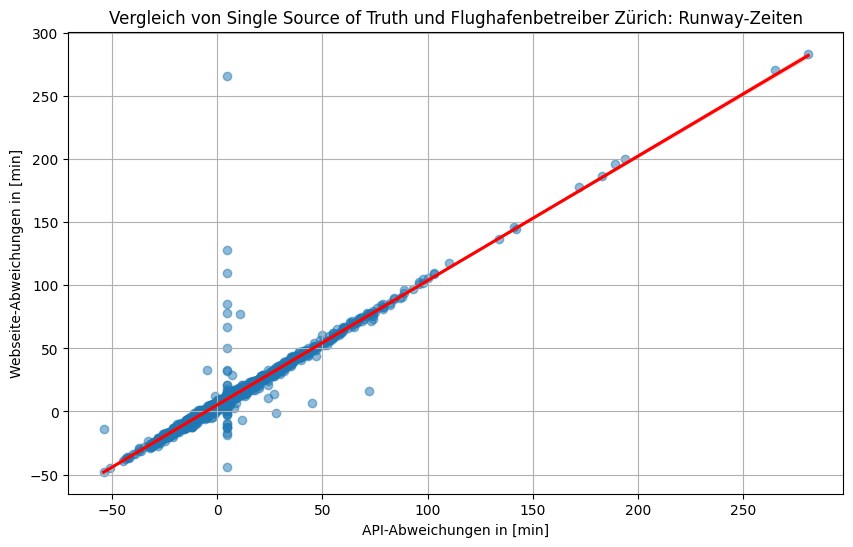

In [50]:
plt.figure(figsize=(10, 6))
sns.regplot(x='calculated_runway_delay_api', y='delay_arrival_zrh', data=df_zrh, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Vergleich von Single Source of Truth und Flughafenbetreiber Zürich: Runway-Zeiten')
plt.xlabel('API-Abweichungen in [min]')
plt.ylabel('Webseite-Abweichungen in [min]')
plt.grid(True)
plt.show()

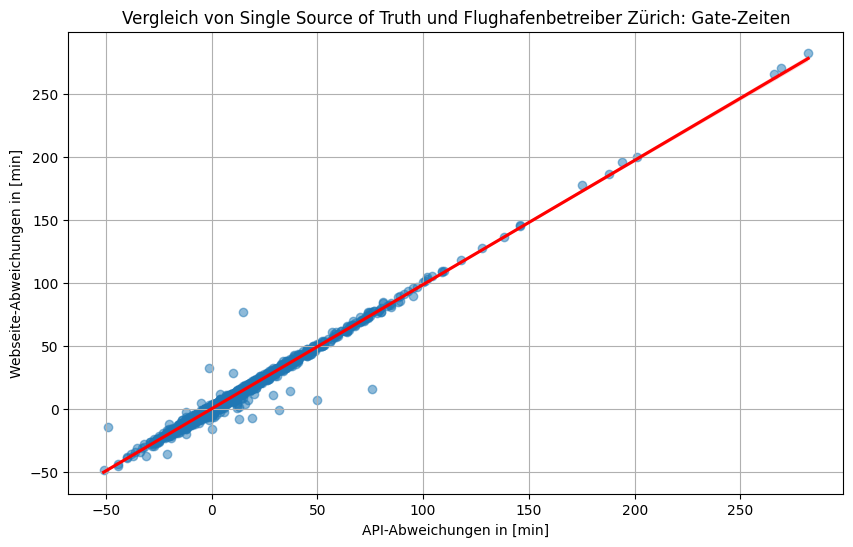

In [51]:
plt.figure(figsize=(10, 6))
sns.regplot(x='calculated_gate_delay_api', y='delay_arrival_zrh', data=df_zrh, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Vergleich von Single Source of Truth und Flughafenbetreiber Zürich: Gate-Zeiten')
plt.xlabel('API-Abweichungen in [min]')
plt.ylabel('Webseite-Abweichungen in [min]')
plt.grid(True)
plt.show()

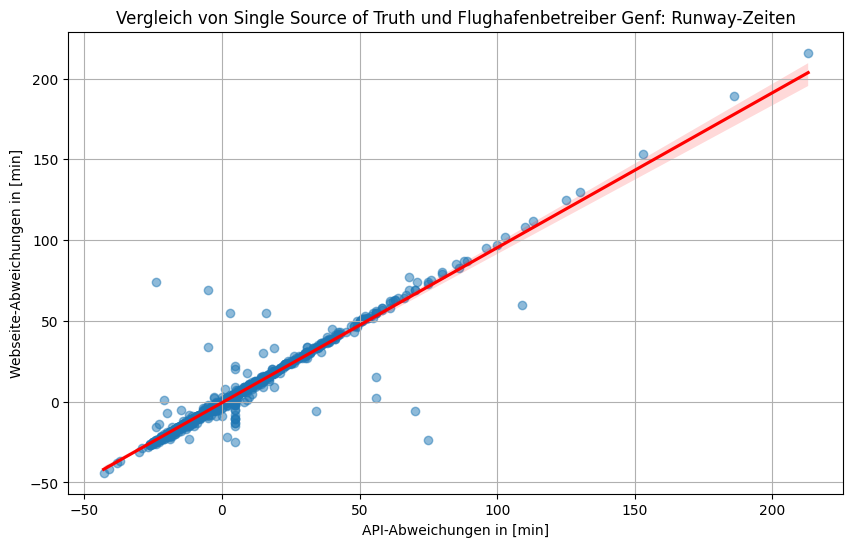

In [52]:
plt.figure(figsize=(10, 6))
sns.regplot(x='calculated_runway_delay_api', y='delay_arrival_gva', data=df_gva, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Vergleich von Single Source of Truth und Flughafenbetreiber Genf: Runway-Zeiten')
plt.xlabel('API-Abweichungen in [min]')
plt.ylabel('Webseite-Abweichungen in [min]')
plt.grid(True)
plt.show()

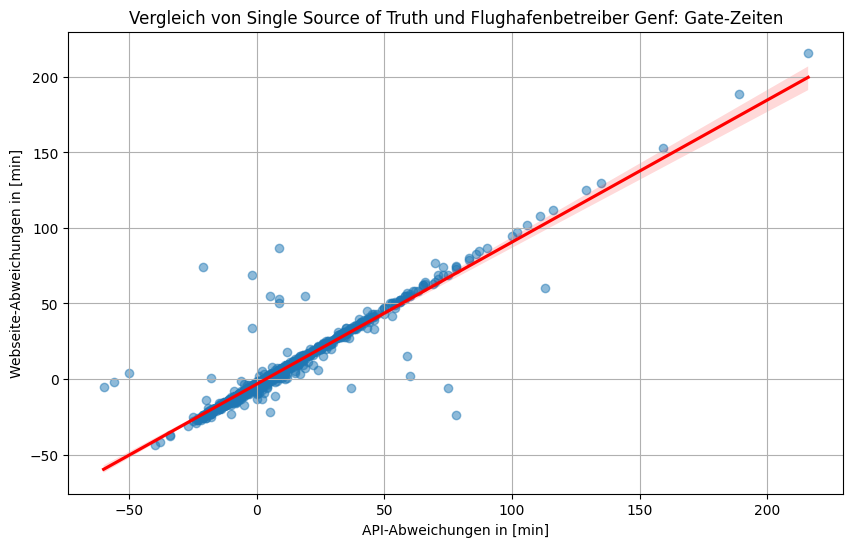

In [53]:
plt.figure(figsize=(10, 6))
sns.regplot(x='calculated_gate_delay_api', y='delay_arrival_gva', data=df_gva, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Vergleich von Single Source of Truth und Flughafenbetreiber Genf: Gate-Zeiten')
plt.xlabel('API-Abweichungen in [min]')
plt.ylabel('Webseite-Abweichungen in [min]')
plt.grid(True)
plt.show()

In [54]:
correlation_zrh_runway = df_zrh['calculated_runway_delay_api'].corr(df_zrh['delay_arrival_zrh'])
correlation_gva_runway = df_gva['calculated_runway_delay_api'].corr(df_gva['delay_arrival_gva'])
correlation_zrh_gate = df_zrh['calculated_gate_delay_api'].corr(df_zrh['delay_arrival_zrh'])
correlation_gva_gate = df_gva['calculated_gate_delay_api'].corr(df_gva['delay_arrival_gva'])

print("Korrelationskoeffizient Zürich-Runway: ", correlation_zrh_runway)
print("Korrelationskoeffizient Genf-Runway: ", correlation_gva_runway)
print("Korrelationskoeffizient Zürich-Gate: ", correlation_zrh_gate)
print("Korrelationskoeffizient Genf-Gate: ", correlation_gva_gate)

Korrelationskoeffizient Zürich-Runway:  0.9496707989851731
Korrelationskoeffizient Genf-Runway:  0.9593655730076492
Korrelationskoeffizient Zürich-Gate:  0.9917474359420403
Korrelationskoeffizient Genf-Gate:  0.9446868352322253


Lineare Regression zu den einzelnen Messpunkten & Datenquellen:
- Mittels Funktion `lineregress` aus `Scipy Stats`

In [55]:
slope_zrh_runway, intercept_zrh_runway, r_value, p_value, std_err = linregress(df_zrh['calculated_runway_delay_api'], df_zrh['delay_arrival_zrh'])
print(f"Regressionsgerade Zürich Runway: y = {slope_zrh_runway:.2f}x + {intercept_zrh_runway:.2f}")

Regressionsgerade Zürich Runway: y = 0.99x + 5.16


In [56]:
slope_gva_runway, intercept_gva_runway, r_value, p_value, std_err = linregress(df_gva['calculated_runway_delay_api'], df_gva['delay_arrival_gva'])
print(f"Regressionsgerade Genf Runway: y = {slope_gva_runway:.2f}x + {intercept_gva_runway:.2f}")


Regressionsgerade Genf Runway: y = 0.96x + -0.65


In [57]:
slope_zrh_gate, intercept_zrh_gate, r_value, p_value, std_err = linregress(df_zrh['calculated_gate_delay_api'], df_zrh['delay_arrival_zrh'])
print(f"Regressionsgerade Zürich Gate: y = {slope_zrh_gate:.2f}x + {intercept_zrh_gate:.2f}")


Regressionsgerade Zürich Gate: y = 0.99x + 0.21


In [58]:
slope_gva_gate, intercept_gva_gate, r_value, p_value, std_err = linregress(df_gva['calculated_gate_delay_api'], df_gva['delay_arrival_gva'])
print(f"Regressionsgerade Genf Gate: y = {slope_gva_gate:.2f}x + {intercept_gva_gate:.2f}")

Regressionsgerade Genf Gate: y = 0.94x + -3.35


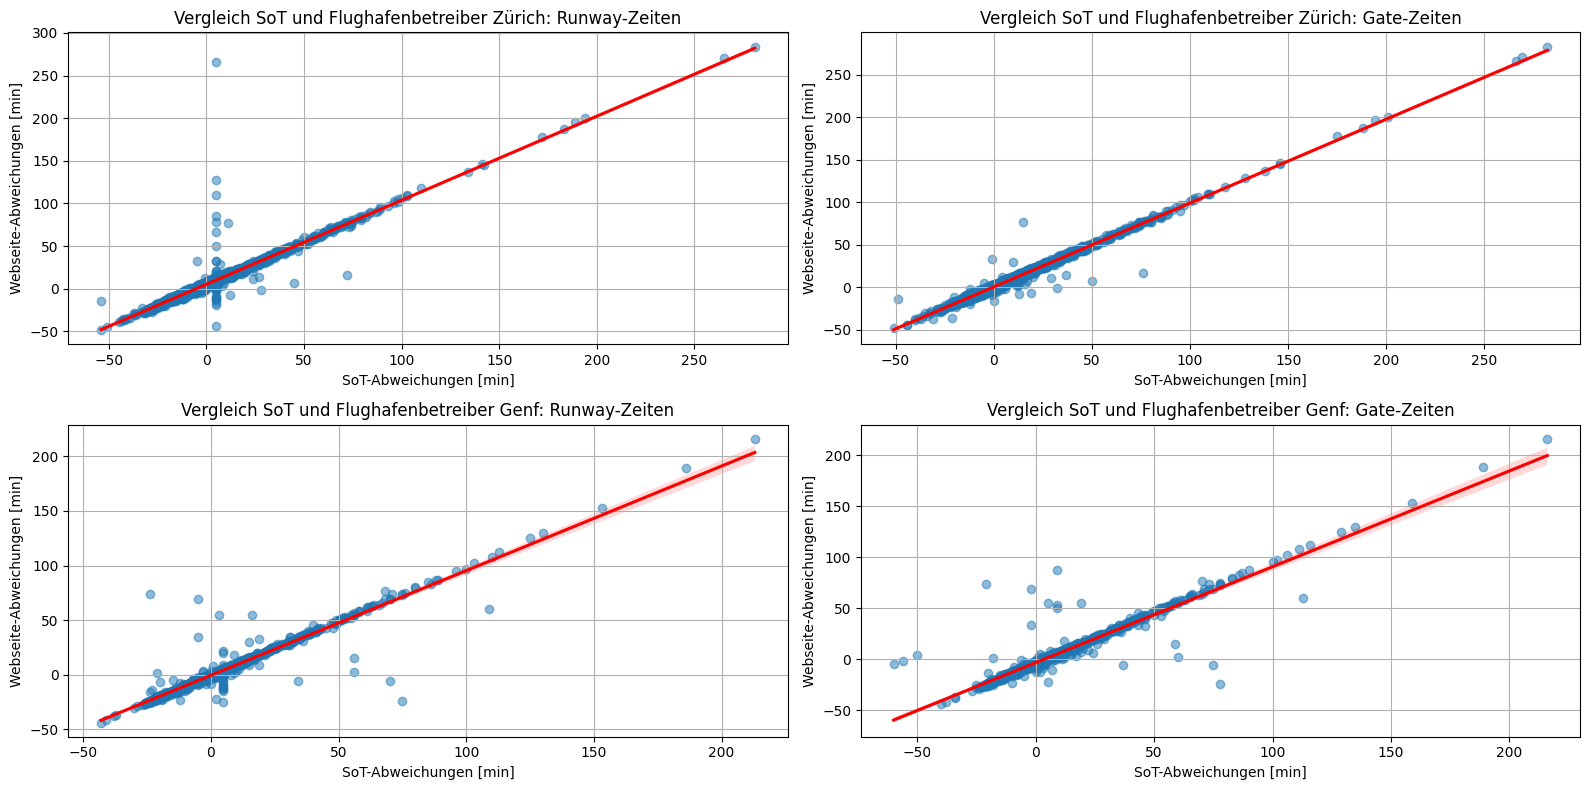

In [59]:
#Erstellen von allen oben erstellten Plots in einem Raster 2x2
#Angabe der Position erfolgt über die Zuteilung in axes[0, 0
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))

#Scatterplot für Zürich Runway
sns.regplot(x='calculated_runway_delay_api', y='delay_arrival_zrh', data=df_zrh, 
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, ax=axes[0, 0])
axes[0, 0].set_title('Vergleich SoT und Flughafenbetreiber Zürich: Runway-Zeiten')
axes[0, 0].set_xlabel('SoT-Abweichungen [min]')
axes[0, 0].set_ylabel('Webseite-Abweichungen [min]')
axes[0, 0].grid(True)

#Scatterplot für Zürich Gate
sns.regplot(x='calculated_gate_delay_api', y='delay_arrival_zrh', data=df_zrh, 
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, ax=axes[0, 1])
axes[0, 1].set_title('Vergleich SoT und Flughafenbetreiber Zürich: Gate-Zeiten')
axes[0, 1].set_xlabel('SoT-Abweichungen [min]')
axes[0, 1].set_ylabel('Webseite-Abweichungen [min]')
axes[0, 1].grid(True)

#Scatterplot für Genf Runway
sns.regplot(x='calculated_runway_delay_api', y='delay_arrival_gva', data=df_gva, 
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, ax=axes[1, 0])
axes[1, 0].set_title('Vergleich SoT und Flughafenbetreiber Genf: Runway-Zeiten')
axes[1, 0].set_xlabel('SoT-Abweichungen [min]')
axes[1, 0].set_ylabel('Webseite-Abweichungen [min]')
axes[1, 0].grid(True)

#Scatterplot für Genf Gate
sns.regplot(x='calculated_gate_delay_api', y='delay_arrival_gva', data=df_gva, 
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, ax=axes[1, 1])
axes[1, 1].set_title('Vergleich SoT und Flughafenbetreiber Genf: Gate-Zeiten')
axes[1, 1].set_xlabel('SoT-Abweichungen [min]')
axes[1, 1].set_ylabel('Webseite-Abweichungen [min]')
axes[1, 1].grid(True)

#Anzeigen der Gesamtfigur mit Anpassungen
plt.tight_layout()
plt.show()

# Anhang: Nicht verwendet / Nur als Entwurf

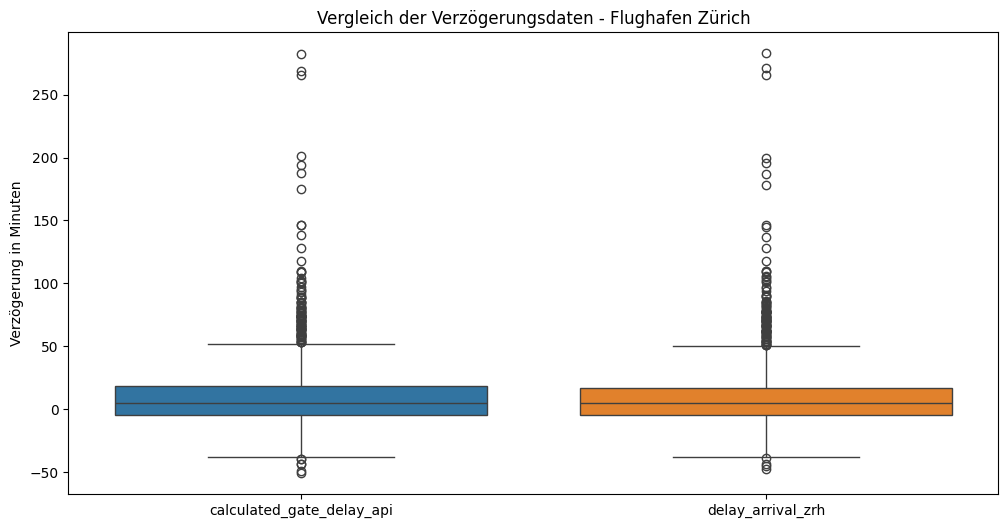

In [60]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_zrh[['calculated_gate_delay_api', 'delay_arrival_zrh']])
plt.title('Vergleich der Verzögerungsdaten - Flughafen Zürich')
plt.ylabel('Verzögerung in Minuten')
plt.show()

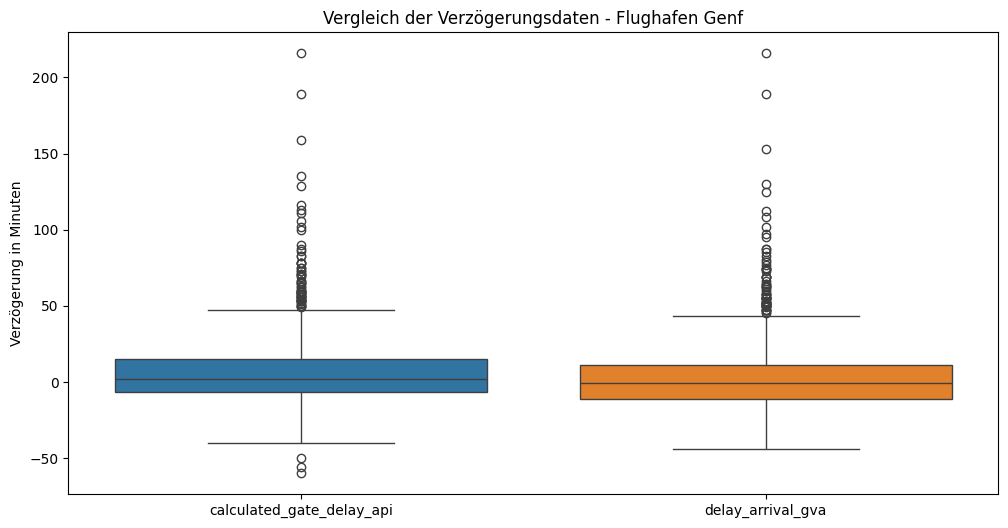

In [61]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_gva[['calculated_gate_delay_api', 'delay_arrival_gva']])
plt.title('Vergleich der Verzögerungsdaten - Flughafen Genf')
plt.ylabel('Verzögerung in Minuten')
plt.show()

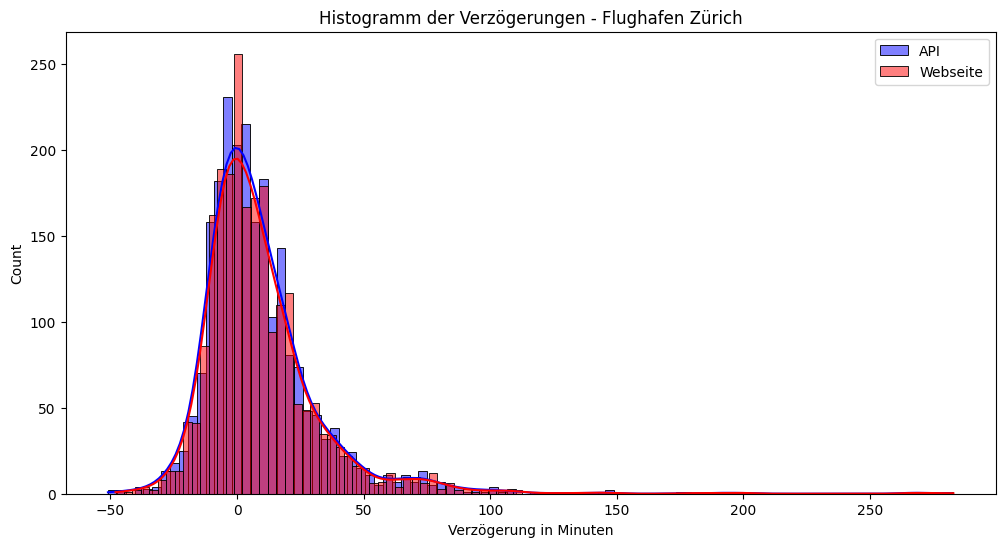

In [62]:
plt.figure(figsize=(12, 6))
sns.histplot(df_zrh, x='calculated_gate_delay_api', color='blue', label='API', kde=True)
sns.histplot(df_zrh, x='delay_arrival_zrh', color='red', label='Webseite', kde=True)
plt.title('Histogramm der Verzögerungen - Flughafen Zürich')
plt.xlabel('Verzögerung in Minuten')
plt.legend()
plt.show()

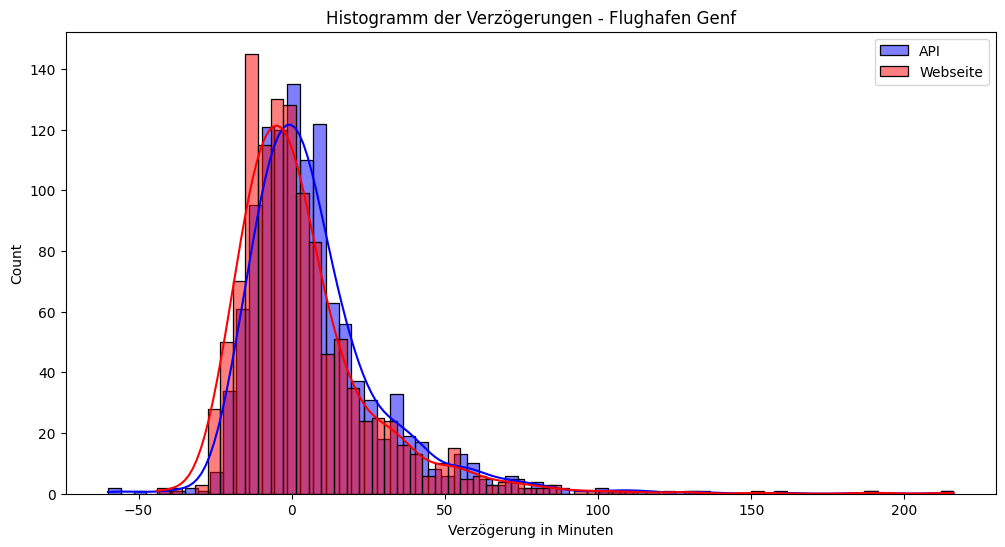

In [63]:
plt.figure(figsize=(12, 6))
sns.histplot(df_gva, x='calculated_gate_delay_api', color='blue', label='API', kde=True)
sns.histplot(df_gva, x='delay_arrival_gva', color='red', label='Webseite', kde=True)
plt.title('Histogramm der Verzögerungen - Flughafen Genf')
plt.xlabel('Verzögerung in Minuten')
plt.legend()
plt.show()